Q1)

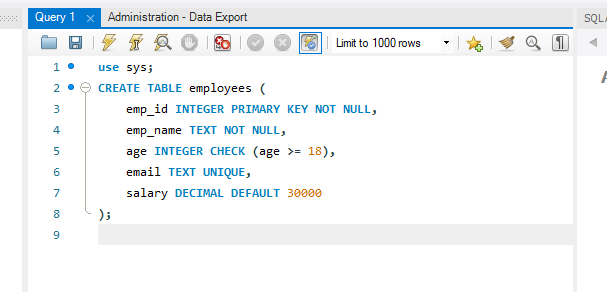

Q2)

Purpose of Constraints in a Database
Constraints are rules applied to columns in a database table to enforce data integrity—ensuring that the data stored in the database is accurate, consistent, and meaningful. They help prevent invalid data from being inserted, updated, or deleted, thereby maintaining the reliability of the database.

How Constraints Help Maintain Data Integrity
Prevent Invalid Data Entry: Constraints restrict the type or range of data that can be entered.

Example: A CHECK (age >= 18) constraint ensures no underage employee is added.

Ensure Uniqueness: They make sure that certain fields are unique across rows.

Example: A UNIQUE constraint on email ensures no two employees share the same email.

Enforce Relationships Between Tables: Foreign key constraints maintain referential integrity between related tables.

Example: A department_id in the employees table must exist in the departments table.

Control Default Behavior: Default values can be set to avoid NULLs or missing data.

Example: salary DECIMAL DEFAULT 30000 fills in a salary if one is not provided.


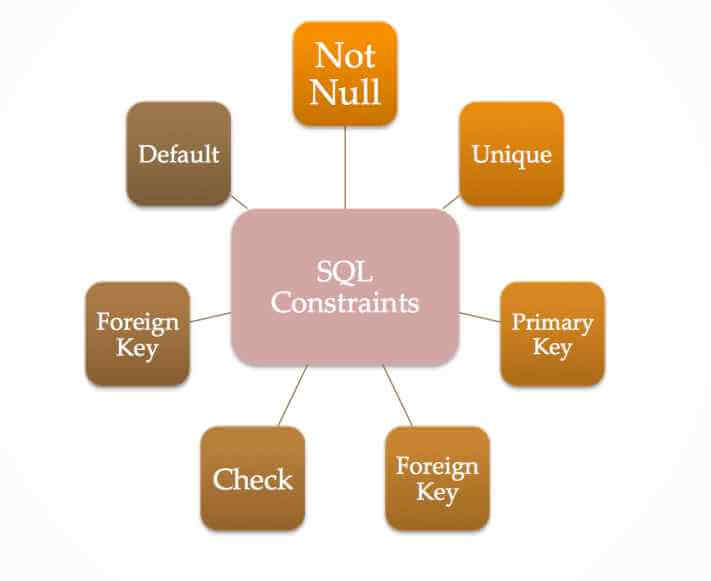

Q3)

The NOT NULL constraint is used to ensure that a column cannot have NULL (empty) values. You apply it when a field is essential for the meaning or function of the data.

Reasons to Use NOT NULL:

Data Completeness: Critical fields like emp_name, email, or emp_id should always have values.

Business Rules Enforcement: If a value is mandatory for a business process, it must not be null.

Avoid Logic Errors: NULL values can lead to unexpected behavior in queries, joins, or calculations.

Indexing Efficiency: Some databases perform better indexing when NULLs are restricted.

Can a Primary Key Contain NULL Values?
No, a primary key cannot contain NULL values.

Justification:
A primary key uniquely identifies each row in a table.

NULL represents "unknown" or "missing" values, so allowing NULLs in a primary key would violate its purpose.

Most databases automatically impose NOT NULL when you define a column as a PRIMARY KEY

CREATE TABLE employees (
    emp_id INTEGER PRIMARY KEY,  -- NOT NULL is implied here
    emp_name TEXT NOT NULL
);


Q4)

Key SQL Commands

Adding Constraints:

ALTER TABLE table_name ADD CONSTRAINT constraint_name constraint_definition;

Removing Constraints:

ALTER TABLE table_name DROP CONSTRAINT constraint_name;

-- Create sample tables
CREATE TABLE departments (
    dept_id INT PRIMARY KEY,
    dept_name VARCHAR(50) NOT NULL
);

CREATE TABLE employees (
    emp_id INT,
    emp_name VARCHAR(100),
    salary DECIMAL(10,2),
    dept_id INT
);

-- 1. ADD CONSTRAINTS
-- Add primary key
ALTER TABLE employees ADD CONSTRAINT pk_employees PRIMARY KEY (emp_id);

-- Add foreign key
ALTER TABLE employees ADD CONSTRAINT fk_dept
FOREIGN KEY (dept_id) REFERENCES departments(dept_id);

-- Add check constraint
ALTER TABLE employees ADD CONSTRAINT chk_salary
CHECK (salary > 1000);

-- 2. REMOVE CONSTRAINTS
-- Remove check constraint
ALTER TABLE employees DROP CONSTRAINT chk_salary;

-- Remove foreign key
ALTER TABLE employees DROP CONSTRAINT fk_dept;

-- Remove primary key
ALTER TABLE employees DROP CONSTRAINT pk_employees;

-- Clean up (optional)
DROP TABLE employees;
DROP TABLE departments;

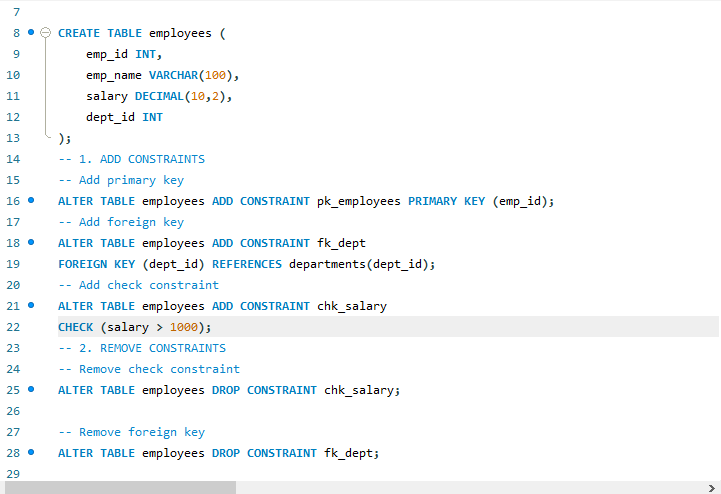

Q5)

use sys;
-- Create sample tables with constraints
CREATE TABLE departments (
    dept_id INT PRIMARY KEY,
    dept_name VARCHAR(50) NOT NULL
);

CREATE TABLE employees (
    emp_id INT PRIMARY KEY,
    emp_name VARCHAR(100) NOT NULL,
    salary DECIMAL(10,2) CHECK (salary > 1000),
    dept_id INT REFERENCES departments(dept_id)
);

-- Insert valid data
INSERT INTO departments VALUES (1, 'Engineering');
INSERT INTO employees VALUES (101, 'Javed', 5000, 1);

-- 1. PRIMARY KEY violation (duplicate ID)
BEGIN;
    INSERT INTO employees VALUES (101, 'Jasmin', 6000, 1);
    -- ERROR: duplicate key value violates unique constraint "employees_pkey"
ROLLBACK;

-- 2. FOREIGN KEY violation (nonexistent department)
BEGIN;
    INSERT INTO employees VALUES (102, 'Alhasan', 4500, 99);
    -- ERROR: insert or update on table "employees" violates foreign key constraint "employees_dept_id_fkey"
ROLLBACK;

-- 3. CHECK constraint violation (salary too low)
BEGIN;
    INSERT INTO employees VALUES (103, 'Bashir', 500, 1);
    -- ERROR: new row for relation "employees" violates check constraint "employees_salary_check"
ROLLBACK;

-- 4. NOT NULL violation (missing name)
BEGIN;
    INSERT INTO employees (emp_id, salary, dept_id) VALUES (104, 5500, 1);
    -- ERROR: null value in column "emp_name" violates not-null constraint
ROLLBACK;

-- 5. DELETE violation (referential integrity)
BEGIN;
    DELETE FROM departments WHERE dept_id = 1;
    -- ERROR: update or delete on table "departments" violates foreign key constraint on table "employees"
ROLLBACK;

-- Clean up
DROP TABLE employees;
DROP TABLE departments;

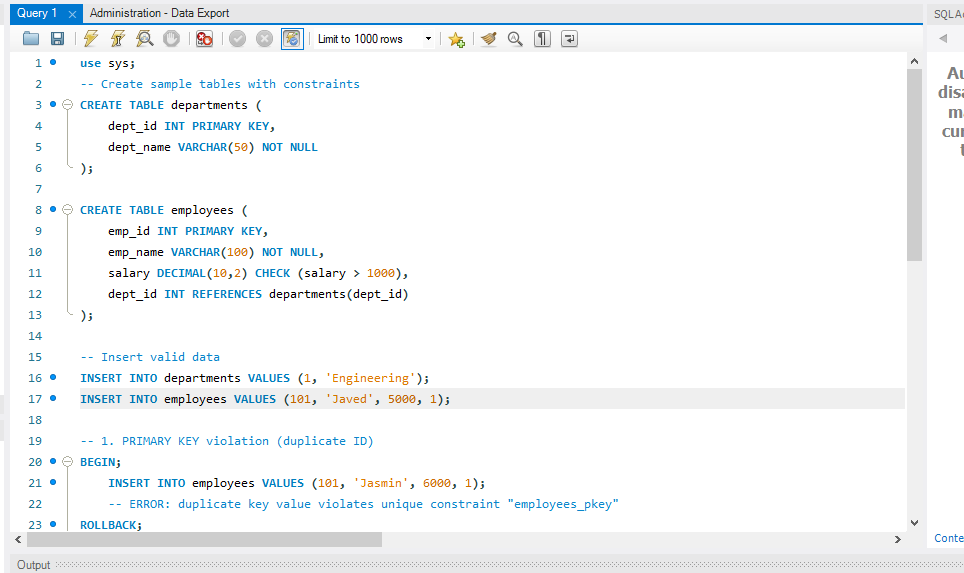





Q6)

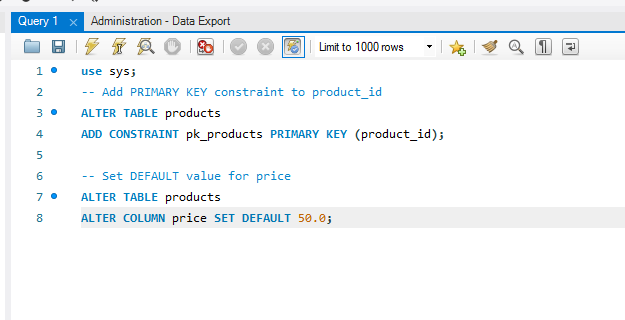

Q7)

use sys;
CREATE TABLE classes (
    class_id INT PRIMARY KEY,
    class_name VARCHAR(50) NOT NULL
);
INSERT INTO classes (class_id, class_name)
(101, 'Math'),
(102, 'Science'),
(103, 'History');

CREATE TABLE students (
    student_id INT PRIMARY KEY,
    student_name VARCHAR(100) NOT NULL,
    class_id INT,
    FOREIGN KEY (class_id) REFERENCES classes(class_id)
);
INSERT INTO students (student_id, student_name, class_id)
VALUES
    (101, 'Alice', 1),  -- Enrolled in Mathematics
    (102, 'Bob', 2), -- Enrolled in Science
    (103, 'Charlie', 3), -- Enrolled in History

SELECT
    students.name AS student_name,
    classes.name AS class_name
FROM
    students
INNER JOIN
    classes ON students.enrolled_class = classes.id;


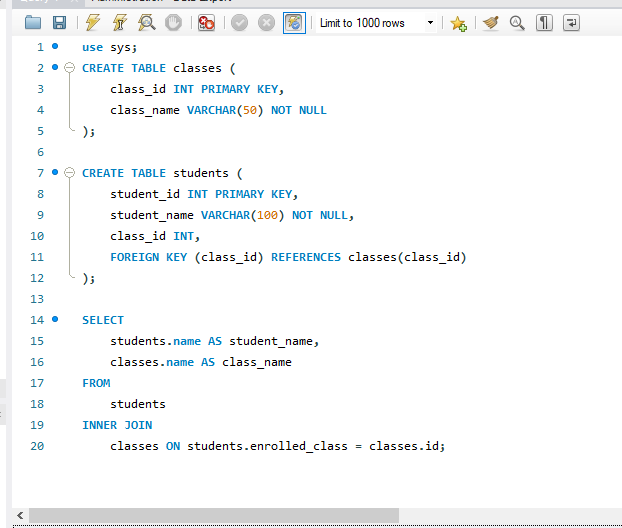

Q8)

-- Create customers table
CREATE TABLE customers (
    customer_id INT PRIMARY KEY,
    customer_name VARCHAR(100) NOT NULL
);

-- Create products table (needed for order details)
CREATE TABLE products (
    product_id INT PRIMARY KEY,
    product_name VARCHAR(100) NOT NULL,
    price DECIMAL(10,2)
);

-- Create orders table
CREATE TABLE orders (
    order_id INT PRIMARY KEY,
    order_date DATE NOT NULL,
    customer_id INT,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);

-- Create order_details table
CREATE TABLE order_details (
    order_id INT,
    product_id INT,
    quantity INT NOT NULL,
    PRIMARY KEY (order_id, product_id),
    FOREIGN KEY (order_id) REFERENCES orders(order_id),
    FOREIGN KEY (product_id) REFERENCES products(product_id)
);


-- Insert customers
INSERT INTO customers (customer_id, customer_name) VALUES
(101, 'Alice'),
(102, 'Bob');


-- Insert products
INSERT INTO products (product_id, product_name, ) VALUES
(1, 'Laptop', 1),
(2, 'phone', 0);  -- This product won't have orders

-- Insert orders
INSERT INTO orders (order_id, order_date, customer_id) VALUES
(1, '2024-01-02', 1),
(2, '2024-01-05', 2);

-- Insert order details
INSERT INTO order_details (order_id, product_id, quantity) VALUES
(1, 101, 2),
(1, 102, 1),
(2, 101, 3);

SELECT
    o.order_id,
    c.customer_name,
    p.product_name,
    od.quantity
FROM
    products p
LEFT JOIN
    order_details od ON p.product_id = od.product_id
LEFT JOIN
    orders o ON od.order_id = o.order_id
LEFT JOIN
    customers c ON o.customer_id = c.customer_id
ORDER BY
    p.product_name, o.order_id;


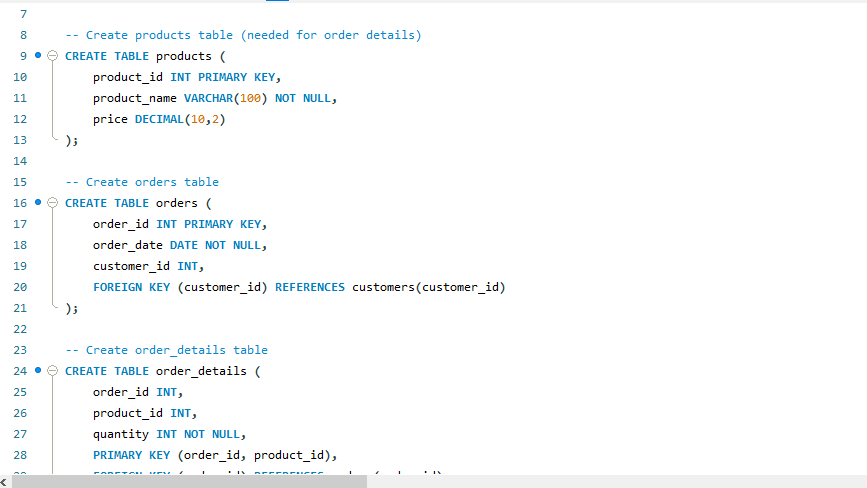

9)

-- Create products table
CREATE TABLE products (
    product_id INT PRIMARY KEY,
    product_name VARCHAR(100) NOT NULL
);

-- Create sales table
CREATE TABLE sales (
    sales_id INT PRIMARY KEY,
    product_id INT,
    amount DECIMAL(10,2) NOT NULL,
    FOREIGN KEY (product_id) REFERENCES products(product_id)
);

-- Insert products
INSERT INTO products (product_id, product_name) VALUES
(101, 'Laptop'),
(1022, 'Phone');

-- Insert sales data
INSERT INTO sales (sales_id, product_id, amount) VALUES
(1, 101, 500),
(2, 102, 300),
(3, 101, 700);


SELECT
    p.product_id,
    p.product_name,
    SUM(s.amount) AS total_sales_amount
FROM
    products p
INNER JOIN
    sales s ON p.product_id = s.product_id
GROUP BY
    p.product_id, p.product_name
ORDER BY
    total_sales_amount DESC;

10)


-- 1. Create the tables
CREATE TABLE customers (
    customer_id INT PRIMARY KEY,
    customer_name VARCHAR(100) NOT NULL
);

CREATE TABLE orders (
    order_id INT PRIMARY KEY,
    order_date DATE NOT NULL,
    customer_id INT,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);

CREATE TABLE order_details (
    order_id INT,
    product_id INT,
    quantity INT NOT NULL,
    PRIMARY KEY (order_id, product_id),
    FOREIGN KEY (order_id) REFERENCES orders(order_id)
);

-- 2. Insert sample data
-- Insert customers
INSERT INTO customers (customer_id, customer_name) VALUES
(1, 'Alice'),
(2, 'Bob');

-- Insert orders
INSERT INTO orders (order_id, order_date, customer_id) VALUES
(1, '2024-01-02', 1),
(2, '2024-01-05', 2);

-- Insert order details
INSERT INTO order_details (order_id, product_id, quantity) VALUES
(1, 101, 2),
(1, 102, 1),
(2, 101, 3);

-- 3. Query to display order_id, customer_name, and quantity of products
SELECT
    o.order_id,
    c.customer_name,
    od.quantity
FROM
    orders o
INNER JOIN
    customers c ON o.customer_id = c.customer_id
INNER JOIN
    order_details od ON o.order_id = od.order_id
ORDER BY
    o.order_id;

#SQL Commands

1)

Primary Keys
Primary keys are columns that uniquely identify each record in a table. In

Maven Movies:

Simple Primary Keys (single column):

actor.actor_id - Unique identifier for actors

film.film_id - Unique identifier for movies

customer.customer_id - Unique identifier for customers

staff.staff_id - Unique identifier for employees

Composite Primary Keys (multiple columns):

film_actor(film_id, actor_id) - Junction table connecting films and actors

film_category(film_id, category_id) - Junction table for film genres

Foreign Keys
Foreign keys create relationships between tables by referencing primary keys in other tables:

Common Foreign Keys:

film.language_id → language.language_id

film_actor.actor_id → actor.actor_id

film_actor.film_id → film.film_id

inventory.film_id → film.film_id

rental.customer_id → customer.customer_id

payment.customer_id → customer.customer_id

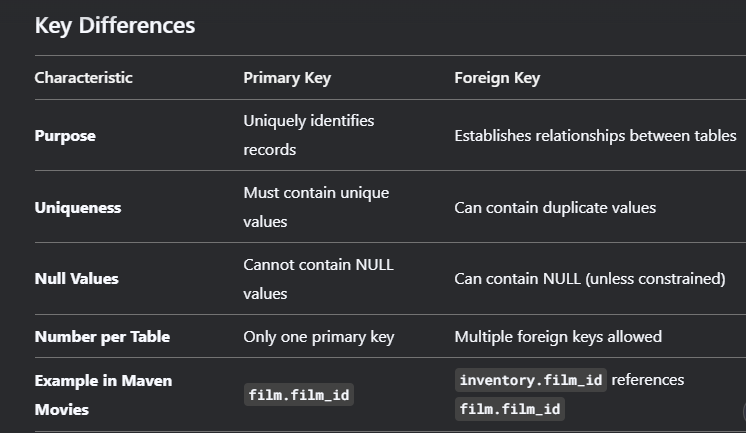

2)
SELECT
    actor_id,
    first_name,
    last_name,
    last_update
FROM
    actor
ORDER BY
    last_name, first_name;

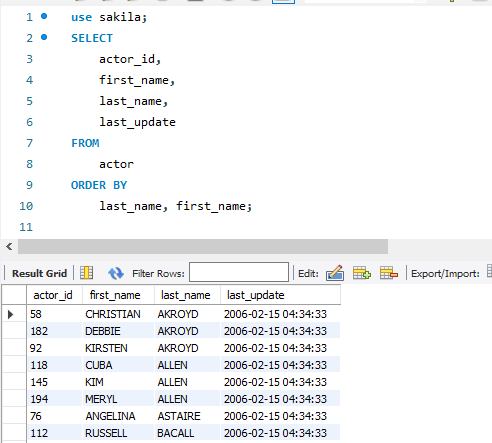

3)
SELECT
    customer_id,
    store_id,
    first_name,
    last_name,
    email,
    address_id,
    active,
    create_date,
    last_update
FROM
    customer
ORDER BY
    last_name, first_name;

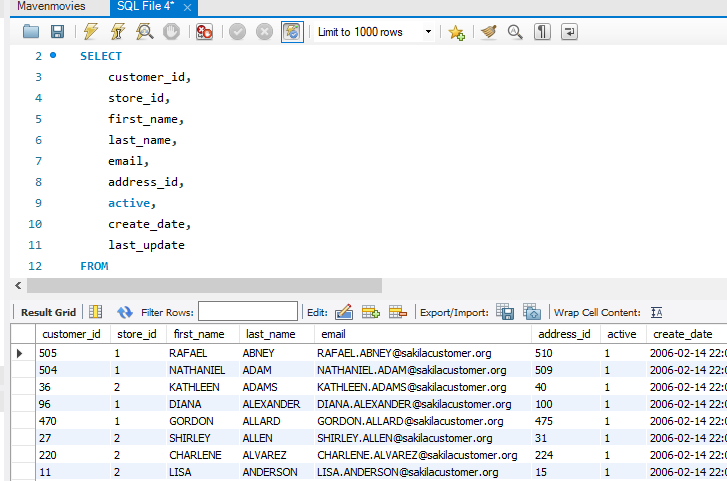

4)

SELECT
    country_id,
    country
FROM
    country
ORDER BY
    country;

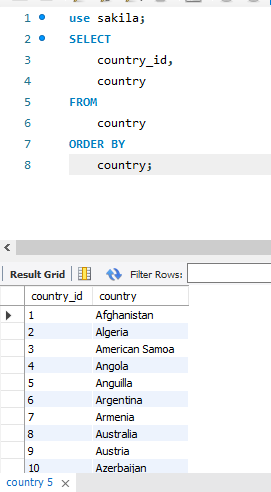

5)

SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    c.email,
    a.address,
    a.district,
    ci.city,
    co.country,
    a.postal_code,
    c.active,
    c.create_date
FROM
    customer c
JOIN
    address a ON c.address_id = a.address_id
JOIN
    city ci ON a.city_id = ci.city_id
JOIN
    country co ON ci.country_id = co.country_id
WHERE
    c.active = 1  -- 1 indicates active customers
ORDER BY
    c.last_name, c.first_name;

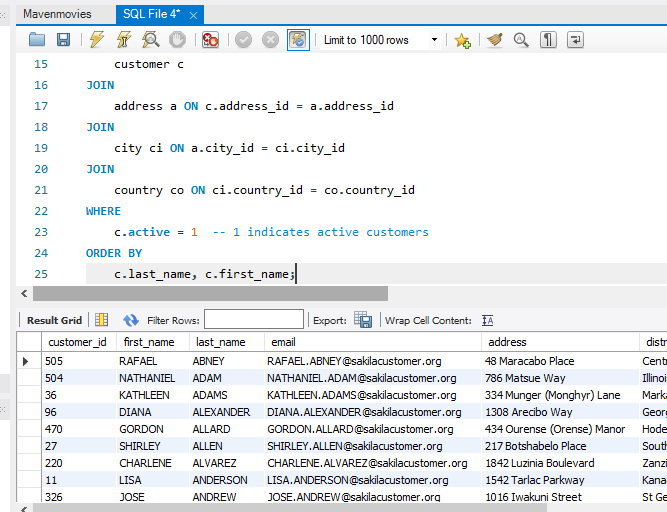

6)

SELECT
    rental_id,
    rental_date,
    inventory_id,
    return_date,
    staff_id
FROM
    rental
WHERE
    customer_id = 1
ORDER BY
    rental_date DESC;

In [ ]:
7)

SELECT
    film_id,
    title,
    description,
    rental_duration,
    rental_rate,
    rating
FROM
    film
WHERE
    rental_duration > 5
ORDER BY
    rental_duration DESC, title;



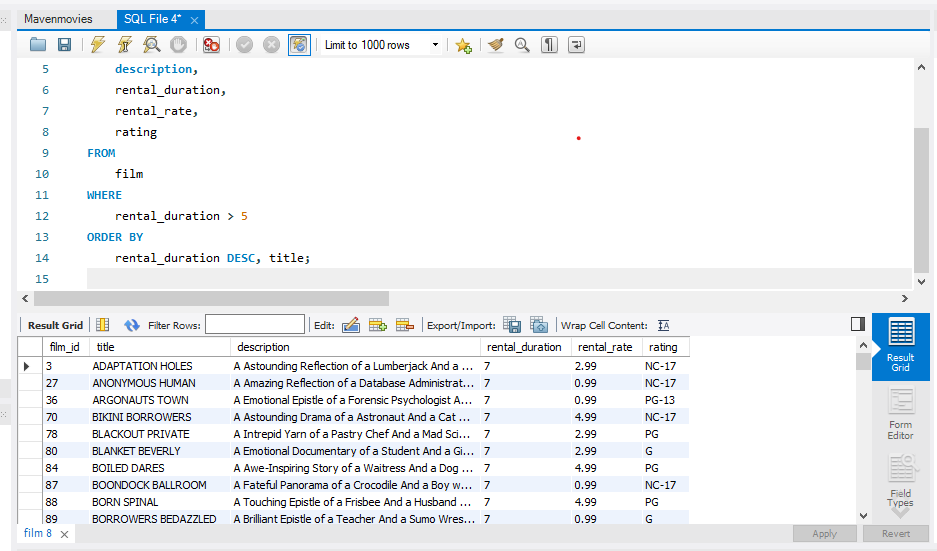

8)

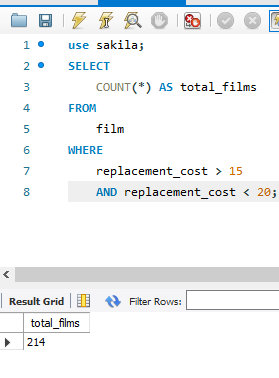



9)

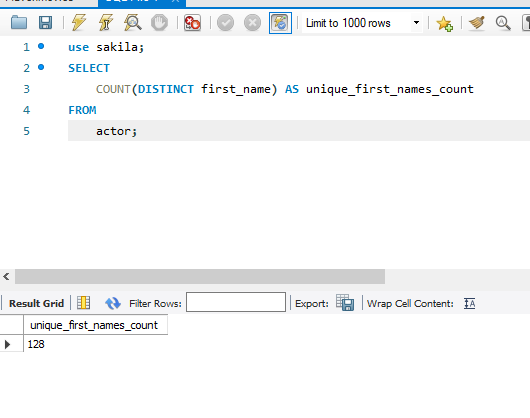

10

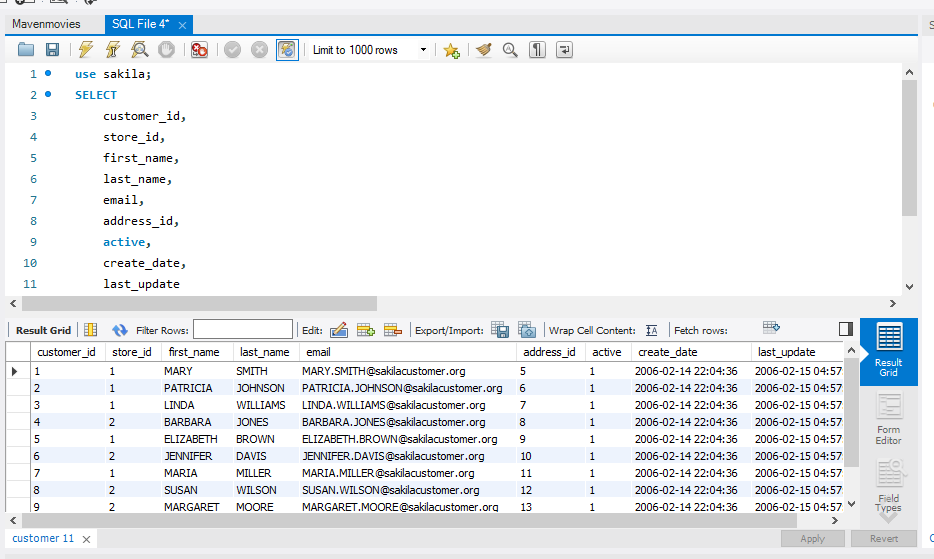

11

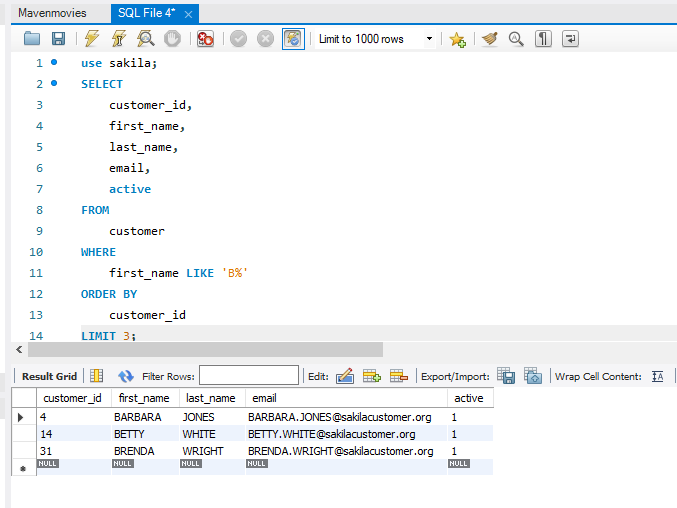

12

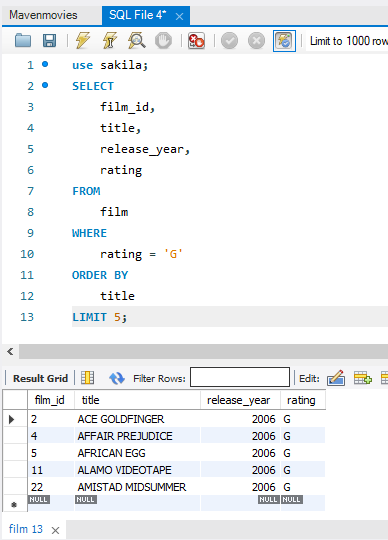

13

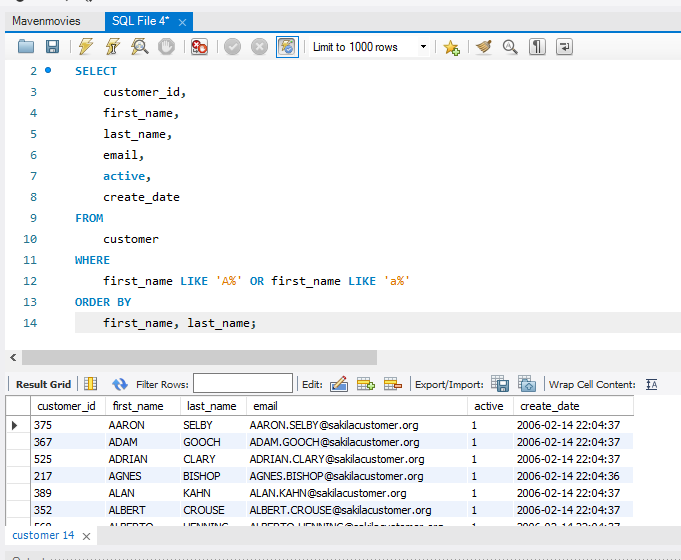

14

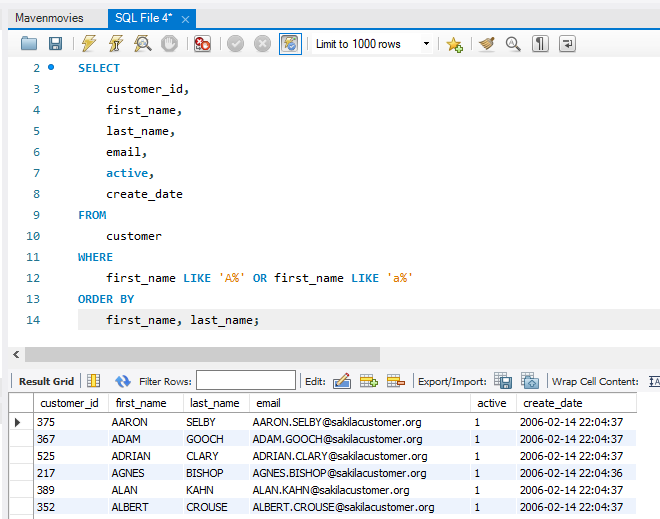

15

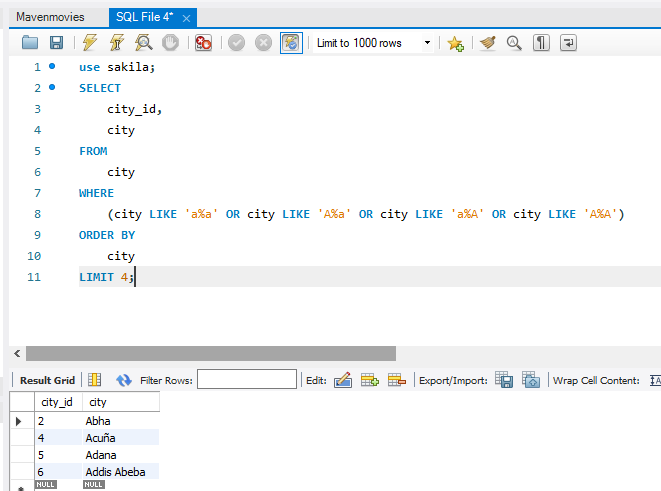

16

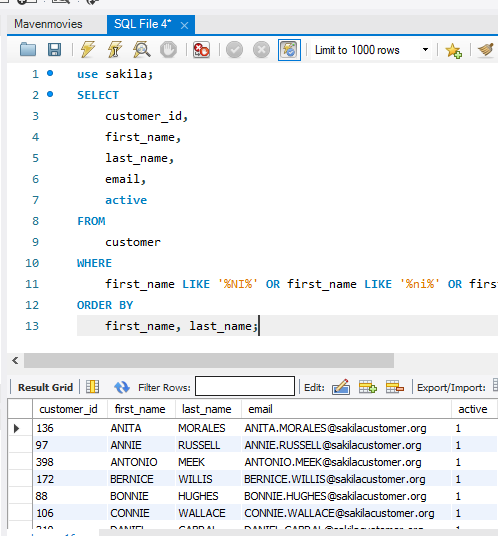

17
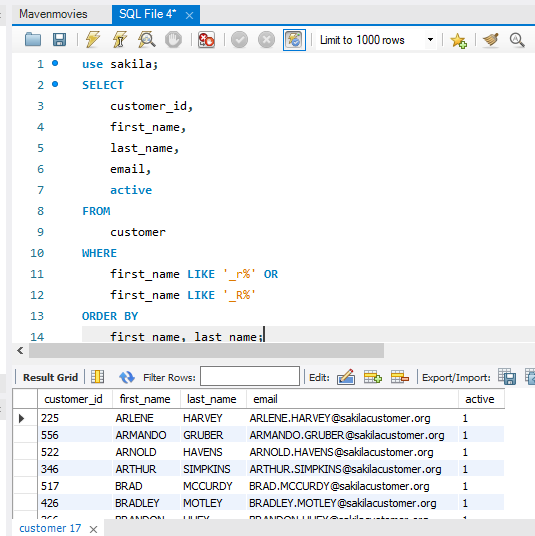

18

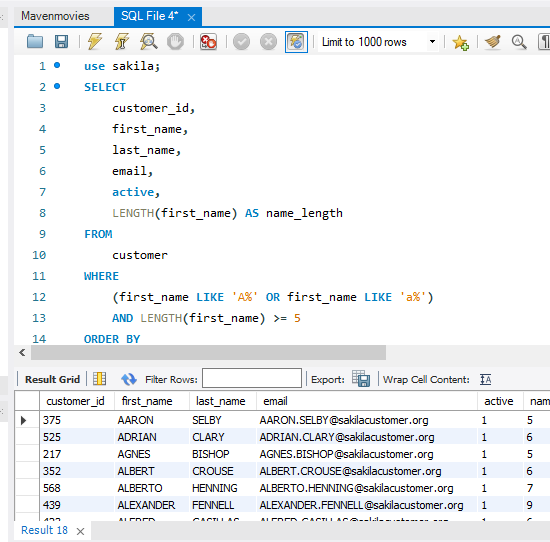

19

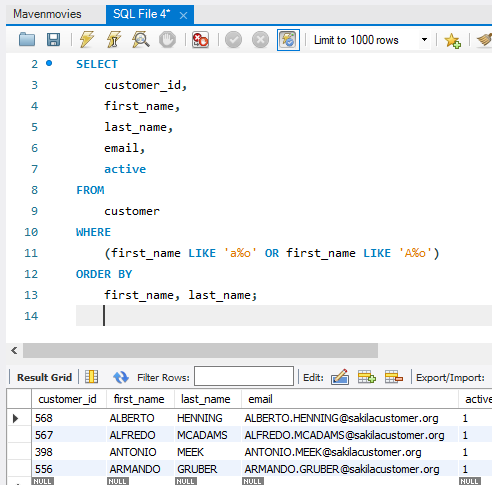

20

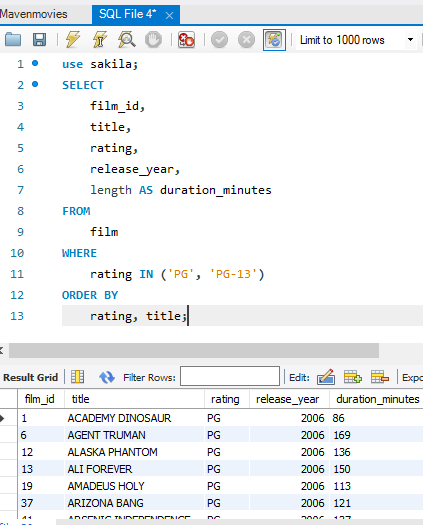

21

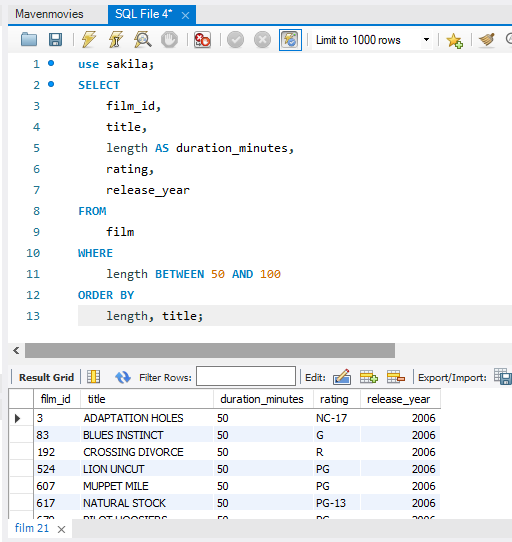

22

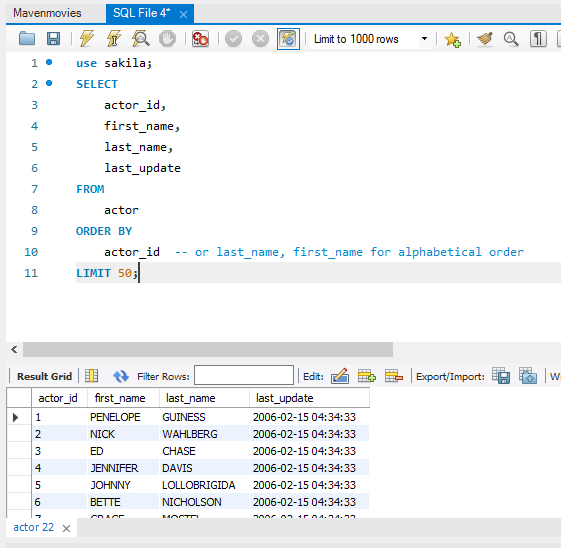

23

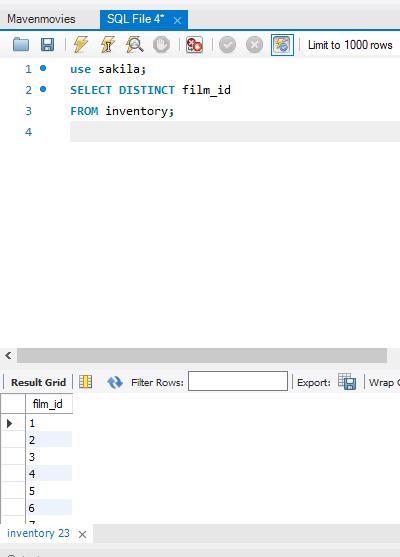

# Functions

1

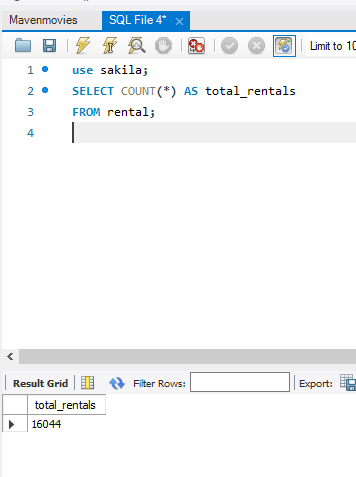

2

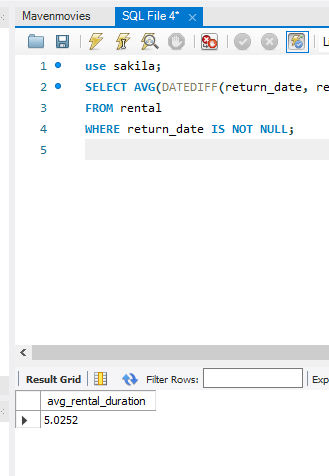

3

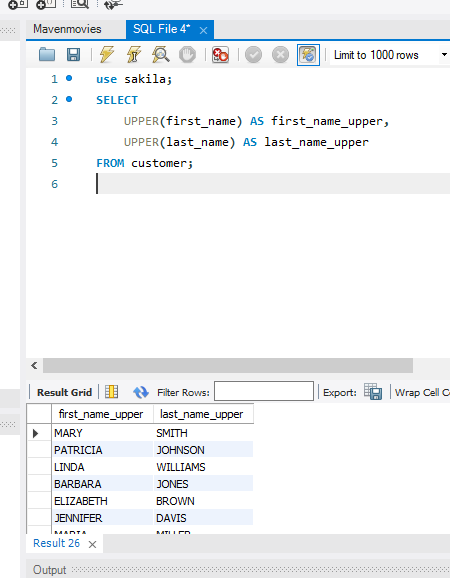

4

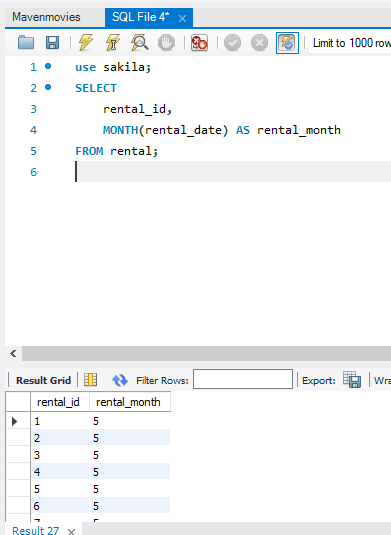

5

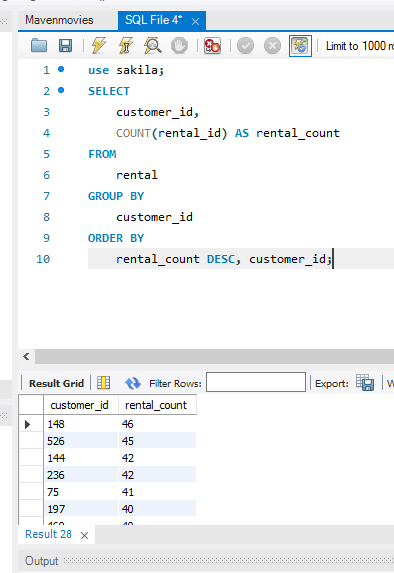

6

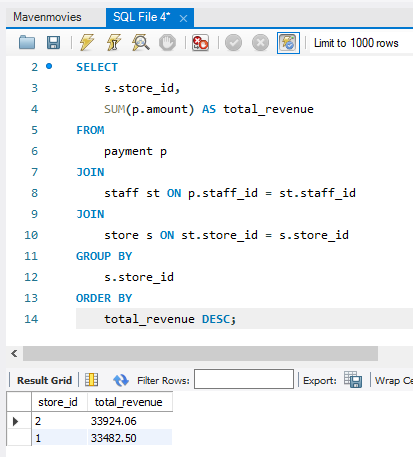

7

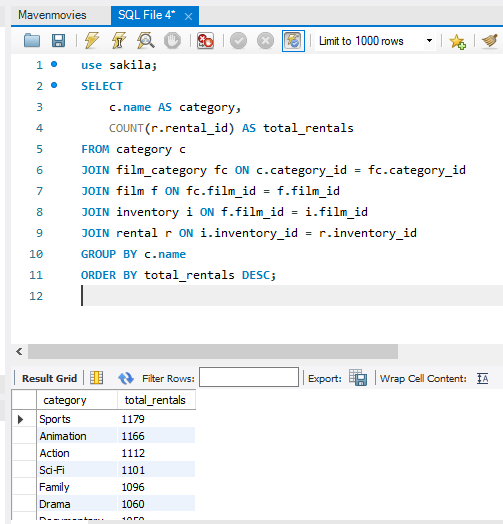

8

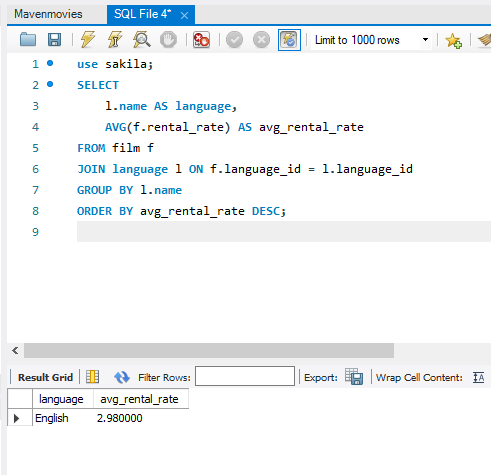

# Joins



9

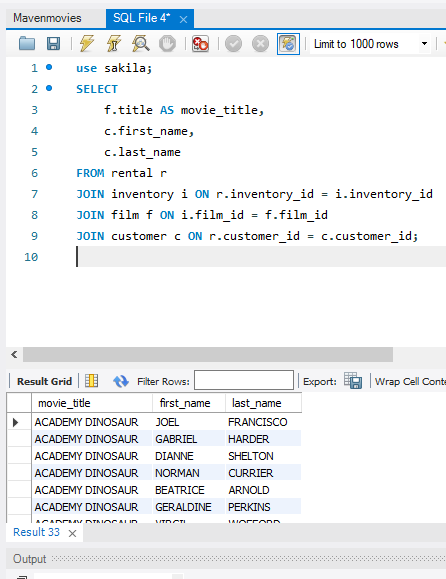

10

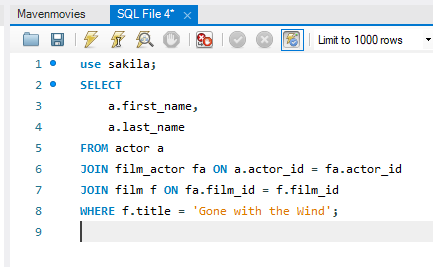

11

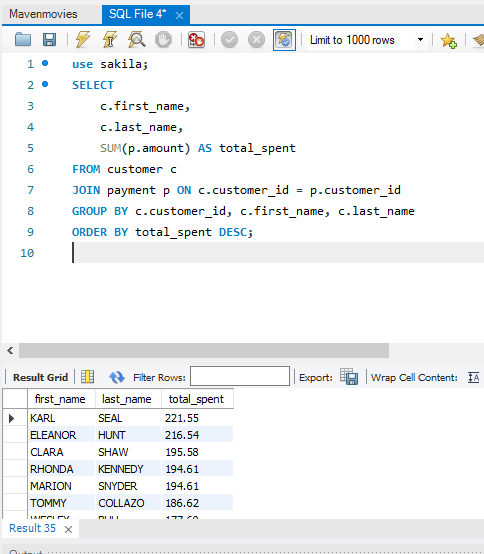

12

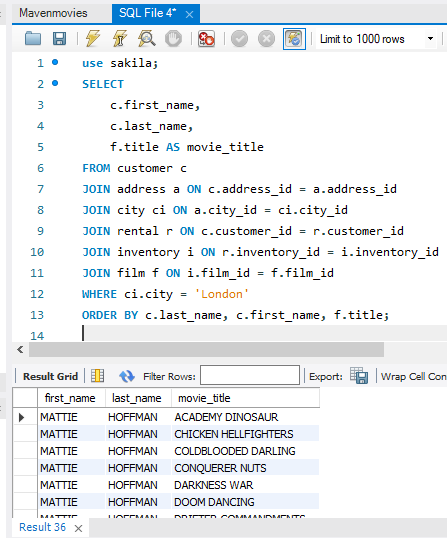

13

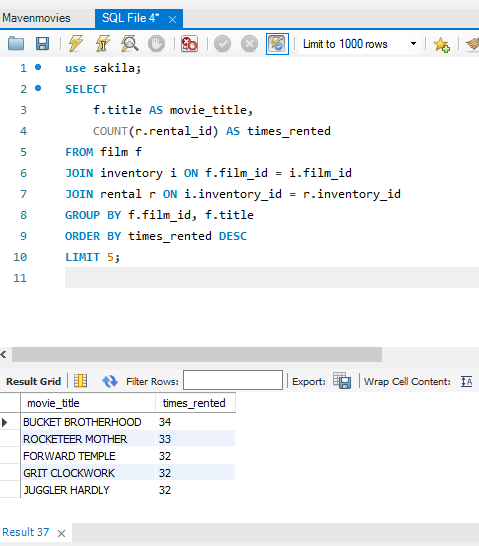

14

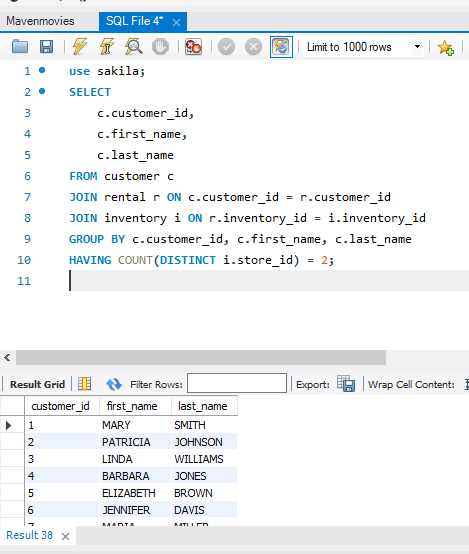

# Windows



1

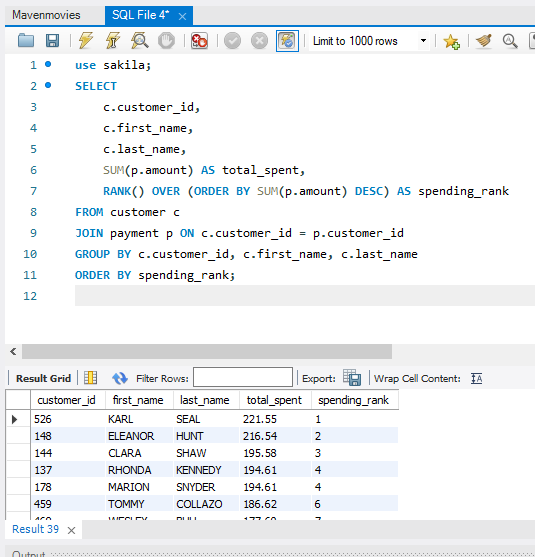

2

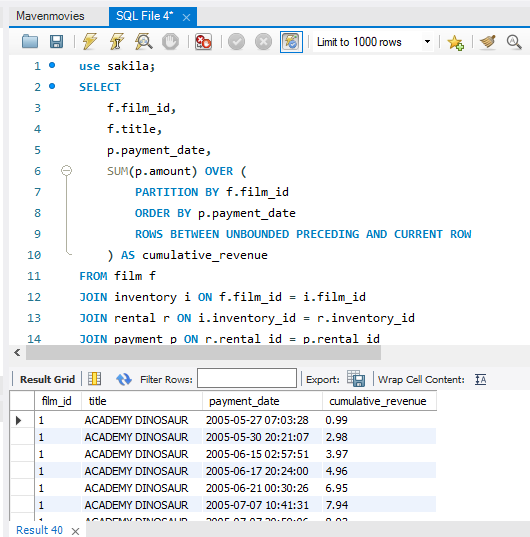

3

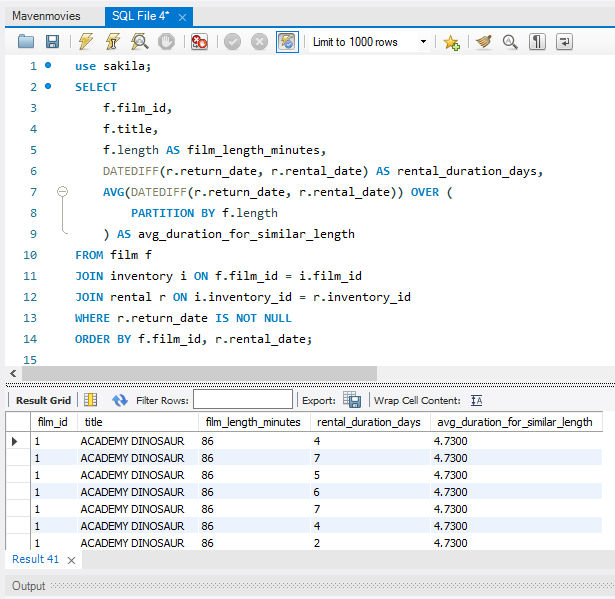

4

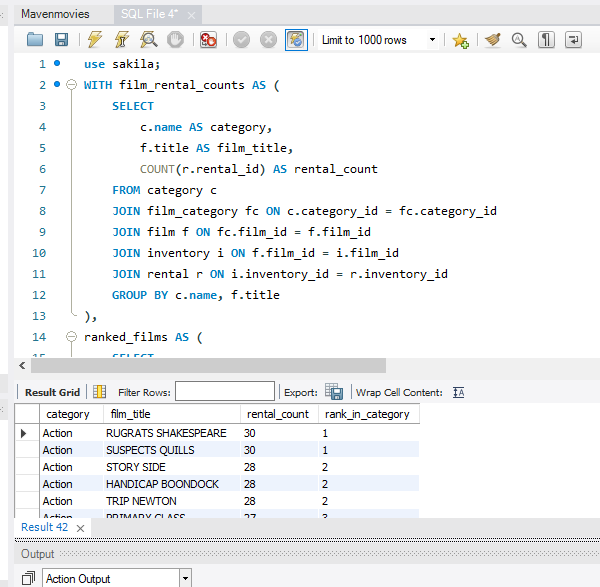

5

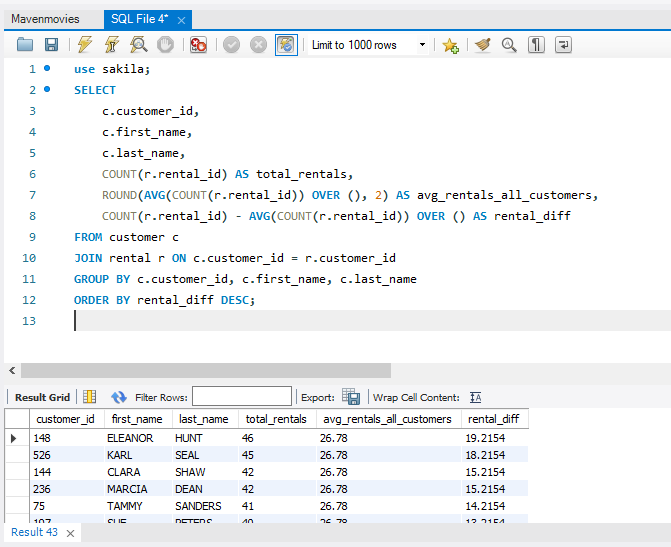

6

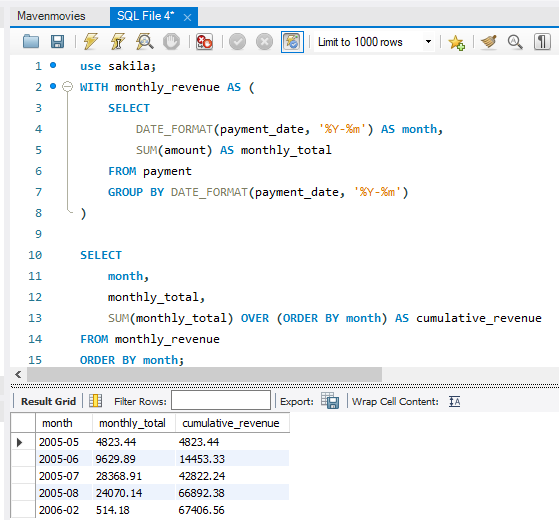

7

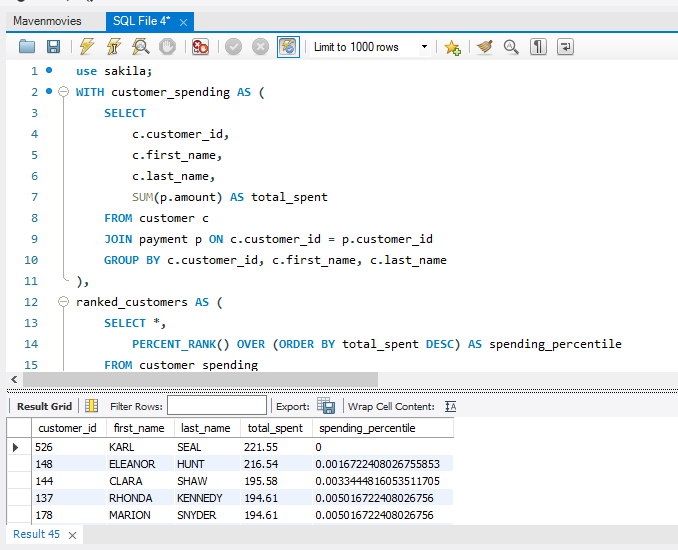

8

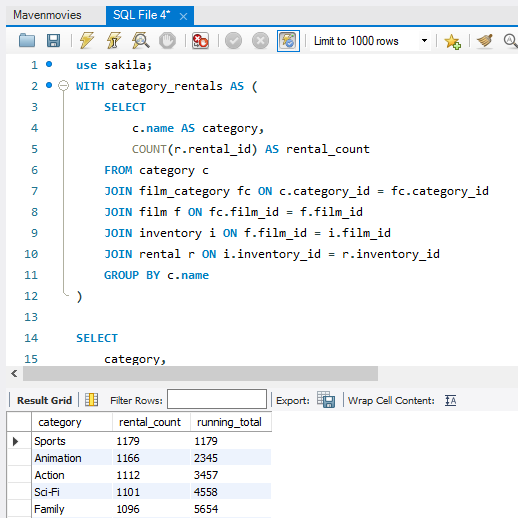

9
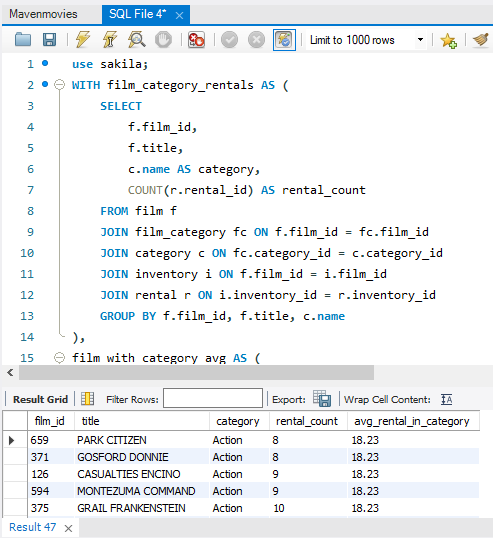

10

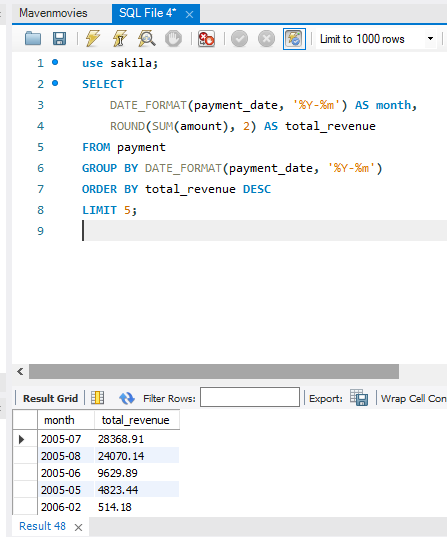

# Normalisation & CTE

1

In the Sakila database, the film table violates 1NF (First Normal Form) because it contains a column called special_features which is a SET data type. This means it can store multiple values in a single cell, which is not allowed in 1NF.

To normalize this table to achieve 1NF, we need to eliminate the repeating group by creating a separate table for special_features. Each special feature for a film will now be stored in a separate row in the film_special_features table.

COMANDS---

CREATE TABLE films1 ( film_id INT PRIMARY KEY);

CREATE TABLE film2 ( film_id INT AUTO_INCREMENT PRIMARY KEY, title VARCHAR(100) NOT NULL, description TEXT, release_year INT) AUTO_INCREMENT=1;

2
let's assume we add a new attribute actor_name to the film_actor table:

CREATE TABLE film_actor ( actor_id INT, film_id INT, actor_name VARCHAR(50), PRIMARY KEY (actor_id, film_id) );

Now, the film_actor table is not in 2NF because the actor_name attribute is not fully functional dependent on the primary key (actor_id, film_id). It's only dependent on actor_id.

To normalize film_actor to 2NF:

Create a new table for actors: Move the actor_name attribute to a new table, actors, with actor_id as the primary key.
CREATE TABLE actors ( actor_id INT PRIMARY KEY, actor_name VARCHAR(50) );

Modify the film_actor table: Remove the actor_name attribute from film_actor, as it's now stored in the actors table.
CREATE TABLE film_actor ( actor_id INT, film_id INT, PRIMARY KEY (actor_id, film_id), FOREIGN KEY (actor_id) REFERENCES actors(actor_id) );

Now, both tables arein 2NF.

3

The film table violates 3NF because of the following transitive dependencies:

- language_id -> language_name (via the language table)
- film_id -> language_id -> language_name (transitive dependency)

To normalize the film table to 3NF:
Move the language_id attribute to a separate table, film_languages, to eliminate the transitive dependency.


CREATE TABLE film_languagesS (
  film_id INT,
  language_id INT,
  PRIMARY KEY (film_id, language_id),
  FOREIGN KEY (film_id) REFERENCES film(film_id),
  FOREIGN KEY (language_id) REFERENCES language(language_id)
);


2. Modify the film table: Remove the language_id attribute from the film table, as it's now stored in the film_languages table.


CREATE TABLE filmSS (
  film_id INT PRIMARY KEY,
  title VARCHAR(100) NOT NULL,
  description TEXT,
  release_year INT,
  rental_duration INT,
  -- Other attributes...
);

4 CREATE TABLE film_unnormalized ( film_id INT, title VARCHAR(100), description TEXT, release_year INT, language_name VARCHAR(50), rental_duration INT, actor_name_1 VARCHAR(50), actor_name_2 VARCHAR(50) );

To achieve 1NF, we'll eliminate the repeating groups and non-atomic data:

CREATE TABLE film_1nf ( film_id INT, title VARCHAR(100), description TEXT, release_year INT, language_id INT, rental_duration INT );

CREATE TABLE film_actors_1nf ( film_id INT, actor_name VARCHAR(50) );

To achieve 2NF, we'll eliminate partial dependencies:

CREATE TABLE film_2nf ( film_id INT PRIMARY KEY, title VARCHAR(100), description TEXT, release_year INT, rental_duration INT );

CREATE TABLE film_languages_2nf ( film_id INT, language_id INT, PRIMARY KEY (film_id, language_id), FOREIGN KEY (film_id) REFERENCES film_2nf(film_id), FOREIGN KEY (language_id) REFERENCES language(language_id) );

CREATE TABLE film_actors_2nf ( film_id INT, actor_id INT, PRIMARY KEY (film_id, actor_id), FOREIGN KEY (film_id) REFERENCES film_2nf(film_id), FOREIGN KEY (actor_id) REFERENCES actor(actor_id) );

5

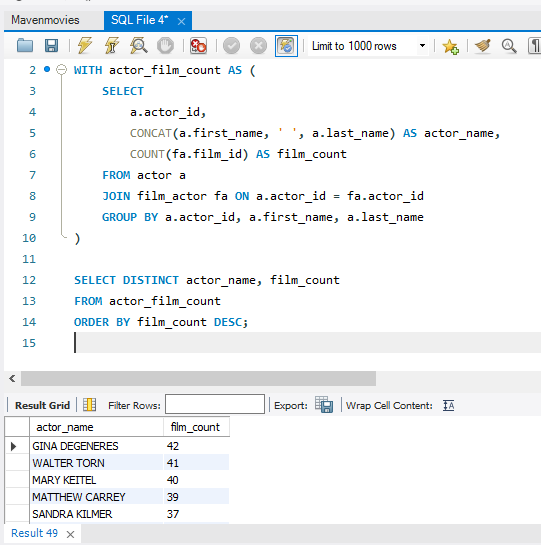

6
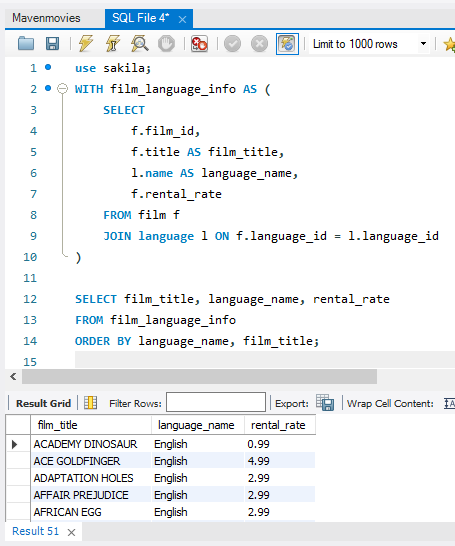

7

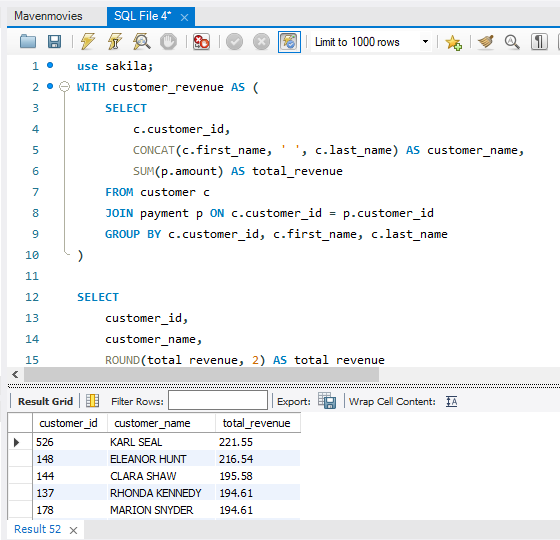

8

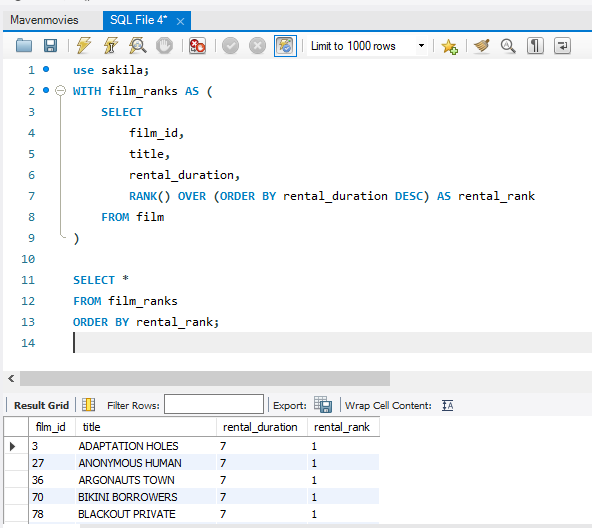

9

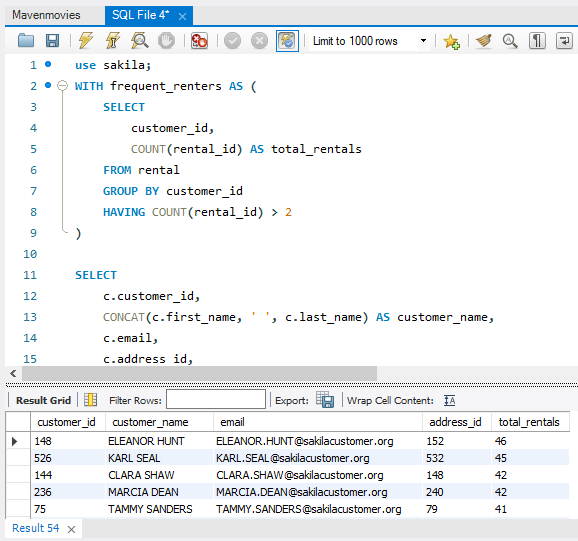

10

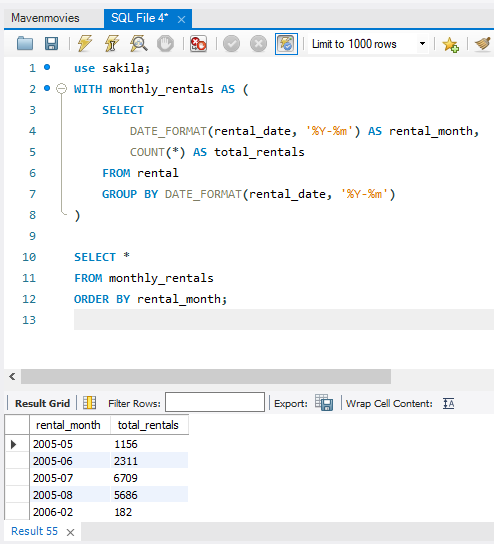

11

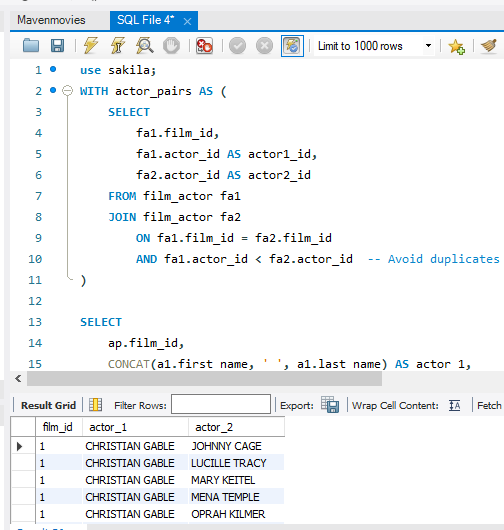

12

use sakila;
CREATE TABLE staff (
    staff_id INT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    reports_to INT NULL,  -- References staff_id of manager
    FOREIGN KEY (reports_to) REFERENCES staff(staff_id)
);

WITH RECURSIVE EmployeeHierarchy AS (
    -- Base case: Start with direct reports of the specified manager
    SELECT
        staff_id,
        first_name,
        last_name,
        reports_to,
        1 AS level,
        CAST(first_name || ' ' || last_name AS VARCHAR(1000)) AS hierarchy_path
    FROM
        staff
    WHERE
        reports_to = :manager_id  -- Parameter for the manager's staff_id
    
    UNION ALL
    
    -- Recursive case: Find all employees who report to someone in the hierarchy
    SELECT
        s.staff_id,
        s.first_name,
        s.last_name,
        s.reports_to,
        eh.level + 1,
        CAST(eh.hierarchy_path || ' → ' || s.first_name || ' ' || s.last_name AS VARCHAR(1000))
    FROM
        staff s
    JOIN
        EmployeeHierarchy eh ON s.reports_to = eh.staff_id
)
SELECT
    staff_id,
    first_name,
    last_name,
    reports_to,
    level,
    hierarchy_path,
    CASE
        WHEN level = 1 THEN 'Direct Report'
        ELSE CONCAT('Indirect Report (Level ', level-1, ')')
    END AS report_type
FROM
    EmployeeHierarchy
ORDER BY
    level, last_name, first_name;

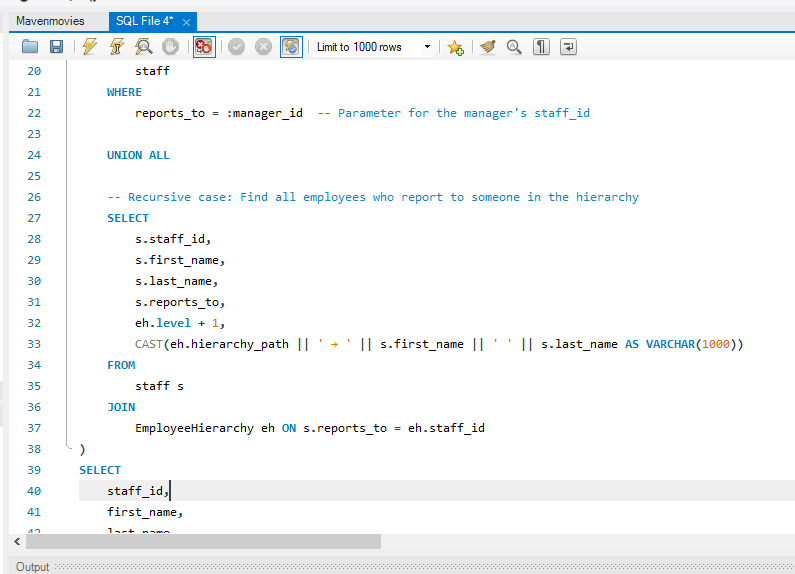